# Machine Learning Workshop

### IEEE SFIT, Jan 2019


### **Instructor**: Santosh Chapaneri

# Logistic Regression: Predicting who will survive on the Titanic 

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir(r"/content/drive/My Drive/ML DL IEEE Workshop")

In [0]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
import sklearn.model_selection as cv
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Load the dataset with Pandas
train = pd.read_csv('titanic.csv')
train.tail(8)                                                      

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.500,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


In [8]:
#Observe columns Pclass, Sex, Age, Survived 
train[train.columns[[2,4,5,1]]].head()                            

,Pclass,Sex,Age,Survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


In [9]:
data = train[['Sex', 'Age', 'Pclass', 'Survived']].copy()
data['Sex'] = data['Sex'] == 'female'                                        
data = data.dropna()                                                         
data.head()                                                                  

,Sex,Age,Pclass,Survived
0,False,22.0,3,0
1,True,38.0,1,1
2,True,26.0,3,1
3,True,35.0,1,1
4,False,35.0,3,0


In [10]:
data_np = data.astype(np.int32).values                                         
X = data_np[:,:-1]                                               
y = data_np[:,-1] 
print(X[:5,:])
print(y[:5])

[[ 0 22  3]
 [ 1 38  1]
 [ 1 26  3]
 [ 1 35  1]
 [ 0 35  3]]
[0 1 1 1 0]


In [11]:
X.shape

(714, 3)

In [12]:
y.shape

(714,)

In [0]:
female = (X[:,0]==1)
survived = (y ==1)

age = X[:,1]

# Compute few histograms
mybins = np.arange(0, 81, 5)
S = {'male': np.histogram(age[survived & ~female], 
                          bins=mybins)[0],
     'female': np.histogram(age[survived & female], 
                            bins=mybins)[0]}
D = {'male': np.histogram(age[~survived & ~female], 
                          bins=mybins)[0],
     'female': np.histogram(age[~survived & female], 
                            bins=mybins)[0]}

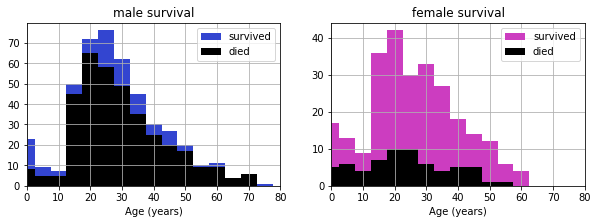

In [14]:
bins = mybins[:-1]
plt.figure(figsize=(10,3));
for i, sex, color in zip((0, 1),
                         ('male', 'female'),
                         ('#3345d0', '#cc3dc0')):
    plt.subplot(121 + i);
    plt.bar(bins, S[sex], bottom=D[sex], color=color,
            width=5, label='survived');
    plt.bar(bins, D[sex], color='k', width=5, label='died');
    plt.xlim(0, 80);
    plt.grid(None);
    plt.title(sex + " survival");
    plt.xlabel("Age (years)");
    plt.legend();

In [0]:
(X_train, X_test, y_train, y_test) = cv.train_test_split(X, y, test_size=.25)

In [16]:
X_train.shape

(535, 3)

In [17]:
X_test.shape

(179, 3)

In [18]:
X_train[:5,:]

array([[ 1,  7,  2],
       [ 0, 24,  3],
       [ 1, 26,  3],
       [ 0,  1,  3],
       [ 1, 34,  2]], dtype=int32)

In [0]:
#instantiate the classifier / 'create the model'
logreg = lm.LogisticRegression(solver='lbfgs')

In [0]:
logreg.fit(X_train, y_train)                                        
y_predicted = logreg.predict(X_test)

In [21]:
y_test[:5]

array([0, 0, 1, 0, 0], dtype=int32)

In [22]:
y_predicted[:5]

array([0, 0, 0, 1, 0], dtype=int32)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

0.7821229050279329

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [25]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predicted)) 

[[88 17]
 [22 52]]


In [26]:
# Run Logistic Regression on the IRIS Dataset
import sklearn.datasets as ds
iris = ds.load_iris()
X, y = iris.data, iris.target
(X_train, X_test, y_train, y_test) = cv.train_test_split(X, y, test_size=.25)

logreg = lm.LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)                                        
y_predicted = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted)) 
print(confusion_matrix(y_test, y_predicted)) 

0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.97        38
   macro avg       0.98      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38

[[ 7  0  0]
 [ 0 15  1]
 [ 0  0 15]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


========================================================================

# Support Vector Machines: Classification

In [0]:
import numpy as np
import pandas as pd
import sklearn.datasets as ds
import sklearn.model_selection as cv
import sklearn.svm as svm
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
X = np.random.randn(200, 2)                                                  
y = (X[:, 0] + X[:, 1]) > 1 

X[:10], y[:10]                                                               

(array([[ 0.86501278, -0.82435103],
        [ 1.55540162, -1.25080009],
        [-1.25410567,  1.25814843],
        [-0.54347014, -0.14413038],
        [-0.29565863, -0.92732464],
        [-2.59272037, -0.95672208],
        [ 0.54359482, -1.85136105],
        [ 0.16432512,  0.23182707],
        [-0.4295975 , -0.45518223],
        [ 0.69811383, -0.99886678]]),
 array([False, False, False, False, False, False, False, False, False,
        False]))

In [29]:
est = svm.LinearSVC()
est.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Text(0.5, 1.0, 'Linearly separable, linear SVC')

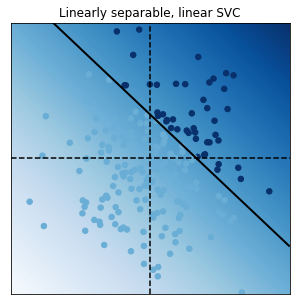

In [30]:
from plot_decisionfun import *
plot_decision_function(est, X, y)                                  
plt.title("Linearly separable, linear SVC")

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Score: 0.6


Text(0.5, 1.0, 'XOR, linear SVC')

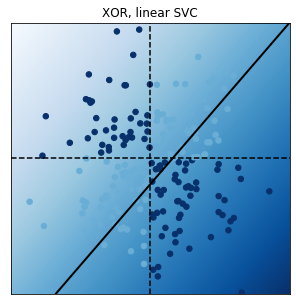

In [31]:
from sklearn.model_selection import GridSearchCV

y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)                                              

# Train the classifier
est = GridSearchCV(svm.LinearSVC(), 
                      {'C': np.logspace(-3., 3., 10)}, cv = 3)
est.fit(X, y)                                                         

print("Score: {0:.1f}".format(cv.cross_val_score(est, X, y).mean()))

# Plot the decision function
plot_decision_function(est, X, y) 
plt.title("XOR, linear SVC")

Score: 0.970


Text(0.5, 1.0, 'XOR, non-linear SVC')

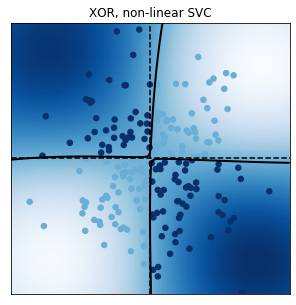

In [32]:
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
est = GridSearchCV(svm.SVC(),                                              
                      {'C': np.logspace(-3., 3., 10),
                       'gamma': np.logspace(-3., 3., 10)}, cv=5)
est.fit(X, y)
print("Score: {0:.3f}".format(
      cv.cross_val_score(est, X, y).mean()))

plot_decision_function(est.best_estimator_, X, y)
plt.title("XOR, non-linear SVC")

### Applying SVM on IRIS dataset

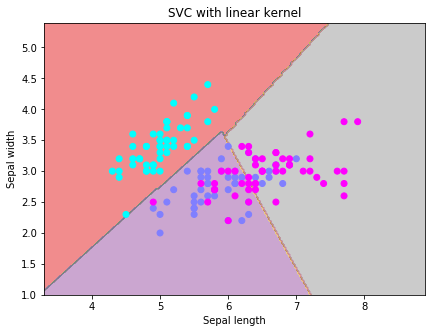

In [33]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
%matplotlib inline

iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

# Plot resulting Support Vector boundaries with original data
# Create fake input data for prediction that we will use for plotting

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]

C = 1.0 
svc = svm.SVC(kernel='linear', C=C, decision_function_shape='ovr').fit(X, y)                 
Z = svc.predict(X_plot)                                 
Z = Z.reshape(xx.shape)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.cool)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [34]:
from sklearn.model_selection import GridSearchCV
import sklearn.model_selection as cv
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=0)

X_train, X_test, y_train, y_test = cv.train_test_split(X, y, test_size=0.25)

parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
                'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

print("# Tuning hyper-parameters")
print()

clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), parameters, cv=5)                 
clf.fit(X_train, y_train)

print("Best parameters set found on training set:")
print()
print(clf.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

# Tuning hyper-parameters

Best parameters set found on training set:

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

Grid scores on training set:

0.357 (+/-0.015) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.357 (+/-0.015) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.643 (+/-0.015) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.777 (+/-0.114) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.767 (+/-0.149) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.794 (+/-0.124) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.357 (+/-0.015) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.634 (+/-0.045) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.777 (+/-0.114) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.785 (+/-0.122) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.785 (+/-0.122) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.795 (+/-0.106) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.634 (+/-0.045) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.777 (+/-0.114) for {'C': 100, 'gamma'

In [36]:
print("Detailed classification report:")
print()
print("The model is trained on the training set.")
print("The scores are computed on the testing set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Detailed classification report:

The model is trained on the training set.
The scores are computed on the testing set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.73      0.73      0.73        15
           2       0.69      0.69      0.69        13

    accuracy                           0.79        38
   macro avg       0.81      0.81      0.81        38
weighted avg       0.79      0.79      0.79        38




In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7894736842105263

## Exercise: SVM for Titanic Dataset

In [0]:
# Titanic with SVM

import numpy as np
import pandas as pd
import sklearn.svm as svm
import sklearn.model_selection as cv
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Load the dataset with Pandas
train = pd.read_csv('titanic.csv')

data = train[['Sex', 'Age', 'Pclass', 'Survived']].copy()
data['Sex'] = data['Sex'] == 'female'
data = data.dropna()

# Create X and Y

# Split the dataset 

# Set the parameters by cross-validation

# Perform Grid Search

# Fit

# Display the best parameters

# Predict on test data

# Show the classification report

========================================================================

# Dimensionality Reduction: Principal Component Analysis (PCA)

## Notes

**PCA Algorithm:**
1. Standardize the data to obtain $S$.

2. Obtain the Eigenvectors and Eigenvalues of $S$ via the **Covariance Matrix** method or **Singular Vector Decomposition** (SVD) method.

3. Sort eigenvalues in **descending** order and choose the $k$ eigenvectors that correspond to the $k$ largest eigenvalues where $k$ is the number of dimensions of the new feature subspace ($k \leq d$).

4. Construct the projection matrix $U$ from the selected $k$ eigenvectors.

5. Transform the original dataset via $U$ to obtain a $k$-dimensional feature subspace.

In [41]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1, 5], [-2, -1, 8], [-3, -2, 6], 
              [1, 1, 8], [2, 1, 5], [3, 2, 9]])
print(X)
print()
pca = PCA(n_components=1)
pca.fit(X)                               

print(pca.components_) 
print()
print(pca.explained_variance_ratio_)
print()
X_pca = pca.transform(X)
print(X_pca)

[[-1 -1  5]
 [-2 -1  8]
 [-3 -2  6]
 [ 1  1  8]
 [ 2  1  5]
 [ 3  2  9]]

[[0.79554567 0.53157493 0.29074936]]

[0.76997386]

[[-1.86016108]
 [-1.78345867]
 [-3.69207799]
 [ 1.66632818]
 [ 1.58962577]
 [ 4.0797438 ]]


### PCA on IRIS dataset

(150, 4)


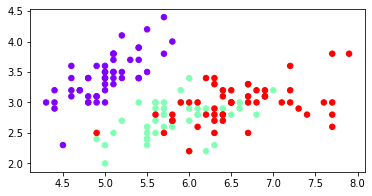

In [42]:
import sklearn.datasets as ds
import matplotlib.pyplot as plt
%matplotlib inline

iris = ds.load_iris()
X = iris.data
y = iris.target
print(X.shape)

plt.figure(figsize=(6,3))
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.rainbow)

In [43]:
from sklearn.decomposition import PCA
pca = PCA()

X_pca = pca.fit_transform(X)

print(pca.components_)
print()
print(pca.explained_variance_ratio_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [-0.31548719  0.3197231   0.47983899 -0.75365743]]

[0.92461872 0.05306648 0.01710261 0.00521218]


In [44]:
print(X_pca.shape)

(150, 4)


In [45]:
X_pca[:,3] 

array([-2.26243707e-03, -9.90265503e-02, -1.99683897e-02,  7.55758166e-02,
        6.12585926e-02,  2.42008576e-02,  4.81431065e-02,  4.52978706e-02,
        2.67447358e-02,  5.62954013e-02,  1.50199245e-02,  1.56379208e-01,
        7.88791149e-03,  2.16798118e-02, -1.59209718e-01, -6.55154587e-03,
       -1.67734737e-01, -7.76281796e-02, -2.70518681e-02,  6.62726502e-02,
        1.50707908e-02, -4.10654027e-02, -4.48212505e-03, -1.48352589e-01,
        3.00330904e-01, -3.46074722e-02, -5.74497158e-02,  1.41727423e-02,
       -6.57834667e-02,  1.23983306e-01,  6.04622767e-02, -2.31628492e-01,
        2.81372347e-01,  9.53488583e-02, -1.90703413e-02, -1.62598446e-01,
       -1.76441213e-01,  1.68173054e-01,  1.07331474e-02,  1.37491513e-02,
       -9.40633590e-02, -3.19987487e-01,  7.46777682e-02, -1.76208890e-01,
        1.82842502e-01, -1.42843574e-01,  1.89622291e-01,  5.95642283e-02,
        4.65686438e-02, -3.46583385e-02, -1.85252879e-02, -5.66512106e-04,
        1.65317587e-03, -

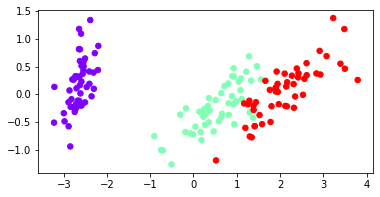

In [46]:
plt.figure(figsize=(6,3))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, s=30, cmap=plt.cm.rainbow)

## Exercise: PCA on Wine Dataset

In [48]:
import pandas as pd
df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 
                   'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [49]:
# Check the shape
df_wine.shape

(178, 14)

In [50]:
# Convert dataframe to values
df_wine_val = df_wine.values
df_wine_val.shape

(178, 14)

In [51]:
np.unique(df_wine_val[:,0])

array([1., 2., 3.])

In [0]:
# Obtain X and y
X, y = df_wine_val[:,1:], df_wine_val[:,0]

In [0]:
# Split the data into 70% training and 30% test subsets
import sklearn.model_selection as cv
X_train, X_test, y_train, y_test = cv.train_test_split(X,y,
test_size=0.3,
stratify=y, random_state=0)

In [0]:
# Standardize the data using StandardScaler 
# obtain X_train_std and X_test_std

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

X_test_std = sc.fit_transform(X_test)

In [0]:
# Apply PCA (2 components) on X_train_std 

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train_std)

In [0]:
# Transform X_test_std using PCA
X_test_pca = pca.transform(X_train_std)

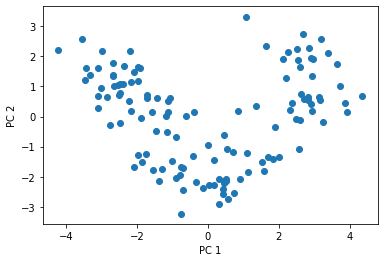

In [57]:
# Do scatter plot of the transformed data
plt.scatter(X_train_pca[:,0], X_train_pca[:,-1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


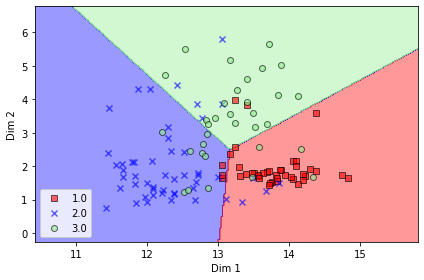

In [58]:
# Train Logistic Regression classifier without using PCA

from sklearn.linear_model import LogisticRegression
from plot_decisionregion import *

lr_no_pca = LogisticRegression(solver='lbfgs', multi_class='ovr')
lr_no_pca = lr_no_pca.fit(X_train[:,:2],y_train)

# Use lr_no_pca classifier
plot_decision_regions(X_train[:,:2],y_train, classifier=lr_no_pca )
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


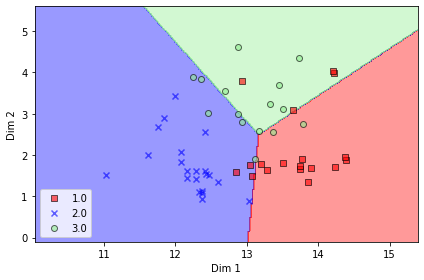

In [59]:
# Test the model
# Use lr_no_pca classifier
plot_decision_regions(X_test[:,:2],y_test, classifier=lr_no_pca ) 

plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


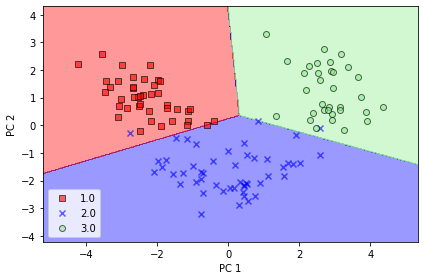

In [61]:
# Train Logistic Regression classifier using the first 2 principal components

from sklearn.linear_model import LogisticRegression
from plot_decisionregion import *

lr_pca = LogisticRegression(solver='lbfgs', multi_class='ovr')
lr_pca = lr_no_pca.fit(X_train_pca[:,:2],y_train)

plot_decision_regions(X_train_pca, y_train, classifier = lr_pca)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


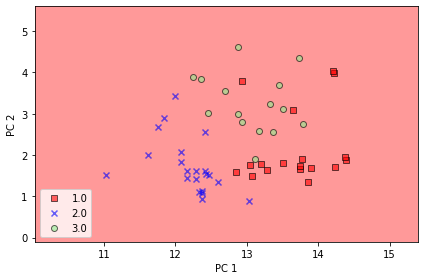

In [63]:
# Test the model
from sklearn.linear_model import LogisticRegression
plot_decision_regions(X_test[:,:2],y_test, classifier=lr_pca )               

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()